# 01. Introduction to TSP

The main goal of this notebook is to familiarize you with the Travelling Salesman Problem.  
For now, we will use only classical algorithms - we will go quantum in the next tutorial.

In this tutorial you will learn the following:
- What is the Travelling Salesman Problem?
- Why it's important?
- How can we solve it?

## What is Travelling Salesman Problem?

TSP (short for Travelling Salesman Problem) is one of the most well-known optimization problems. Imagine the following situation: you are a travelling salesman and you have a plan to visit some 15 cities. You want to visit every city exactly once and return to your starting point and you wonder in what order do you need to do that in order to have the shortest possible route.

This is the Travelling Salesman Problem. It can come in many variations:
- you may want to take into account not the distances between the cities, but cost or time it takes to travel between them.
- you may want to specify other final city, or not specify any at all.
- the distances between the cities might not be symmetrical - distance A -> B is different than B -> A (e.g. due to roadblocks).

For the rest of this tutorial we will deal with the following version (unless stated otherwise): we want to minimize covered distance, which are symmetrical and we don't care about what is the last city.

Looking at it mathematically, you have the following elements here:
- representation of the problem - usually it's either:
    - graph - each node represents a city and each edge the distance between two cities,
    - distance matrix - a matrix, where row and column represents a city and each entry is a distance.
- cost function - what we want to minimize - in our case it's the sum of the distances.
- answer - how do we encode our result? For example, we may want to have a list: [B, C, A, D].

TSP is a NP-hard combinatorial graph problem:
- NP-hard - it can't be solved in the polynomial time and it's easy to evaluate given solution.
- Combinatorial, since your answer is a subset from the set of discrete elements (cities).
- Graph - your map can be represented as a graph.

This is an important problem, since it or its variations may be used in many applications such as:

- Logistics (Delivery optimization, route planning etc.)
- Warehauses (Item picking optimization)
- Transportation (Vehicle routing, e.g. bus routing)
- Manufacturing (Drilling holes in circuit boards)
- X-Ray crystallography
- Genome sequencing
- Many, many others

## Let's code! - 4 cities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_cities(N):
    """
    Creates an array of random points of size N.
    """
    cities = []
    for i in range(N):
        cities.append(np.random.rand(2) * 10)
    return np.array(cities)

Ok, so let's start with simple 4 cities example.  
Since the points are generated by random, if you don't like your setup, just run the cell again.

In [3]:
cities = create_cities(4)

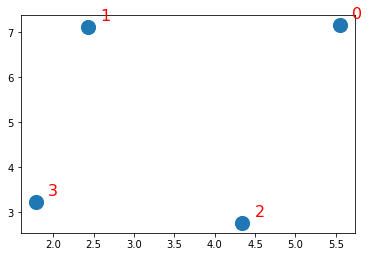

In [4]:
from scripts.plots import plot_cities
plot_cities(cities)

Ok, so we have our cities, so now we can solve the TSP problem!

But before we start, let's prepare some helpers.
Since representing our problem as a distance matrix is very handy, we need a function that will generate a distance matrix out of our list of cities.
We also defined distance as the euclidean distance between the points.

In [5]:
import itertools

def distance_between_points(point_A, point_B):
    return np.sqrt((point_A[0] - point_B[0])**2 + (point_A[1] - point_B[1])**2)

def get_distance_matrix(cities):
    number_of_cities = len(cities)
    matrix = np.zeros((number_of_cities, number_of_cities))
    for i in range(number_of_cities):
        for j in range(i, number_of_cities):
            matrix[i][j] = distance_between_points(cities[i], cities[j])
            matrix[j][i] = matrix[i][j]
    return matrix

So let's take a look at the distance matrix we have

In [6]:
distance_matrix = get_distance_matrix(cities)
print(distance_matrix)

[[0.         3.1188985  4.56088874 5.45358327]
 [3.1188985  0.         4.75054586 3.94890911]
 [4.56088874 4.75054586 0.         2.59852733]
 [5.45358327 3.94890911 2.59852733 0.        ]]


As you can see, it's symmetric and has 0s on the diagonal - it's pretty reasonable, since the distance between city A and city A is 0.

Now we are ready to finaly find the shortest route!

In [7]:
def calculate_cost(cost_matrix, solution):
    cost = 0
    # I skiped one pair (first, last), since we don't care about returning to the starting point
    return sum([cost_matrix[a][b] for a, b  in zip(solution[:-1], solution[1:])])


def solve_tsp_brute_force(cities, starting_city, verbose=True):
    number_of_cities = len(cities)
    initial_order = range(number_of_cities)
    cost_matrix = get_distance_matrix(cities)
    
    # We create all the possible routes
    all_permutations = [list(x) for x in itertools.permutations(initial_order)]
    best_permutation = all_permutations[0]
    best_cost = calculate_cost(cost_matrix, best_permutation)*1000
    
    # We iterate through all the permutations and calculate their cost
    for permutation in all_permutations:
        if permutation[0] != starting_city:
            continue
        current_cost = calculate_cost(cost_matrix, permutation)
        if current_cost < best_cost:
            best_permutation = permutation
            best_cost = current_cost
    if verbose:
        print("Best route:", best_permutation)
        print("Cost:", best_cost)
    return best_permutation

In [8]:
solution = solve_tsp_brute_force(cities, 0)

Best route: [0, 1, 3, 2]
Cost: 9.666334942740214


Ok, so now we can plot our solution!

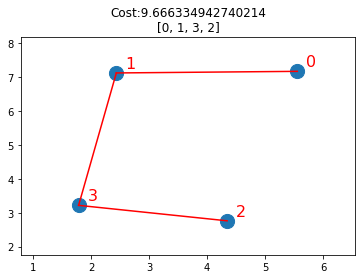

In [9]:
from scripts.plots import plot_solution
plot_solution(cities, solution)

## Let's try something harder

Ok, we have created some functions that do all the heavy lifting for us.
Now it's time to try some harder problems - let's start with 6 cities.

Best route: [0, 4, 5, 1, 2, 3]
Cost: 12.339161138008137


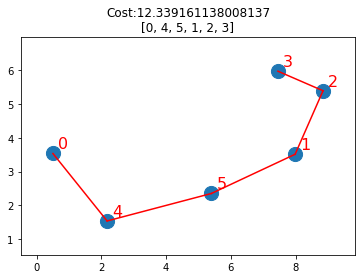

In [10]:
cities_6 = create_cities(6)
solution = solve_tsp_brute_force(cities_6, 0)
plot_solution(cities_6, solution)

And try even more:

Best route: [0, 8, 4, 6, 9, 5, 2, 1, 3, 7]
Cost: 23.656222258895863


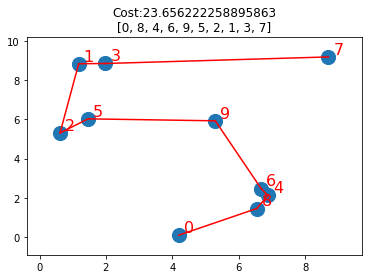

In [11]:
cities_10 = create_cities(10)
solution = solve_tsp_brute_force(cities_10, 0)
plot_solution(cities_10, solution)

You probably noticed, that this one took much longer to find the best route.
Let's find out how much longer.

In [12]:
for i in range(4, 10):
    print(i, "cities")
    %time solution = solve_tsp_brute_force(create_cities(i), 0, verbose=False)

4 cities
CPU times: user 170 µs, sys: 108 µs, total: 278 µs
Wall time: 203 µs
5 cities
CPU times: user 250 µs, sys: 113 µs, total: 363 µs
Wall time: 280 µs
6 cities
CPU times: user 622 µs, sys: 53 µs, total: 675 µs
Wall time: 641 µs
7 cities
CPU times: user 3.38 ms, sys: 134 µs, total: 3.52 ms
Wall time: 3.45 ms
8 cities
CPU times: user 27.9 ms, sys: 2.26 ms, total: 30.2 ms
Wall time: 29.6 ms
9 cities
CPU times: user 329 ms, sys: 20.4 ms, total: 349 ms
Wall time: 350 ms


It seems like the more nodes, the more time it takes more and more time.
You might say - "These numbers don't mean anything - these are randomly generated graphs, we might have been unlucky." 

Ok, so let's be a little bit more methodical about it.  
`%timeit` method runs given method many times and takes the average computing time.  
Don't be surprised if it takes you some time to run it.

3 cities
48.2 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4 cities
81.5 µs ± 7.34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5 cities
144 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6 cities
458 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7 cities
2.78 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8 cities
22 ms ± 874 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


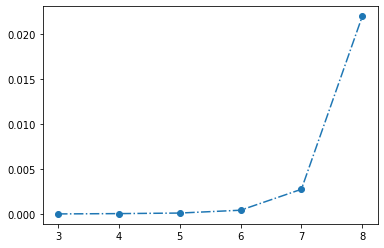

In [13]:
calculation_times = []
city_sizes = range(3, 9)

for i in city_sizes:
    print(i, "cities")
    calc_time = %timeit -o -n 100 solve_tsp_brute_force(create_cities(i), 0, verbose=False) 
    calculation_times.append(calc_time.average)

plt.plot(list(city_sizes), calculation_times, 'o-.')

It looks like a nasty exponential curve. But it's actually not a huge surprise since we used a brute force approach and the number of possible solutions is growing exponentially with each additional city.

Let's try a more reasonable approach than iterating through all possible solutions.

## Simulated annealing

There are many algorithms for solving TSP, though they usually don't guarantee that the solution is the optimal one. For almost all (if not all) practical purposes, we want a solution that is "good enough" - a route of length 100.1 is as good as that of length 100.

That being said, we are good with algorithms called heuristics - they don't guarantee finding an optimal solution, but are pretty fast and reliable.
One of such heuristics is called "simulated annealing" - if you want to learn more about it, please read [wiki](https://en.wikipedia.org/wiki/Simulated_annealing). For our case it's enough that you know it's an algorithm that can solve TSP pretty well and much faster than our brute force approach.

In the `scripts` directory you can find the implementation of simulated annealing (based on [this](https://github.com/chncyhn/simulated-annealing-tsp)).

Below you can see how it works.

In [14]:
from scripts import simulated_annealing 
from scripts.simulated_annealing import SimulatedAnnealer

def solve_tsp_simulated_annealing(cities, starting_city):
    sa = SimulatedAnnealer(cities, stopping_iter=5000, starting_city=starting_city)
    sa.anneal()
    solution = sa.get_best_solution()

    return solution

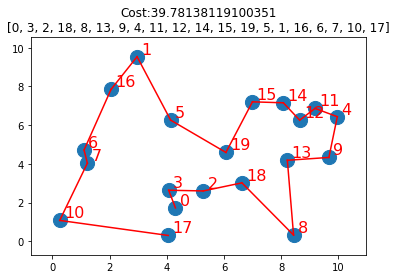

In [15]:
cities = create_cities(20)
sa_solution = solve_tsp_simulated_annealing(cities, 0)
plot_solution(cities, sa_solution)

If you run the code several times for the same cities, you will see that the results vary - especially for the bigger number of cities. As mentioned before, this algorithm is not ideal - but it's really fast.

## Summary and next steps

What we learned?

- TSP is an optimization problem, where we want to find the shortest route which allows us to visit all the cities
- TSP has many variations and formulations, many applications and can be solved in many ways
- Number of possible solutions is growing exponentially fast with the number of cities.
- We have simple code for solving TSP using brute force or simulated annealing, assesing and plotting the results

What's next?

- Introduction to QAOA - quantum computing algorithm which allows us to solve optimization problems with near term devices.


## Additional resources

- https://en.wikipedia.org/wiki/Travelling_salesman_problem
- https://en.wikipedia.org/wiki/Simulated_annealing
- https://github.com/chncyhn/simulated-annealing-tsp
- https://www.intechopen.com/books/traveling-salesman-problem-theory-and-applications/traveling-salesman-problem-an-overview-of-applications-formulations-and-solution-approaches
- http://www.math.uwaterloo.ca/tsp/